<a href="https://colab.research.google.com/github/freedom-780/FBI-Firearm-Background-Check/blob/main/Firearm_Background_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='intro'></a>
## Introduction

> The dataset from The National Instant Criminal Background Check System (NICS) is managed by the FBI  according to the Brady Handgun Violence Prevention Act of 1993 (Brady Act) -- fully implemented on Novemeber 30, 1998 -- and there are differences in state law in regards to requirements. Those that have valid ATF permits and for services and repair picked u by the same person don't require a background check. Data is collected with ATF Form 4473

Types of background checks:

* Handgun—(a) any firearm which has a short stock and is designed to be held and fired by the use of a single hand; and (b) any combination of parts from which a firearm described in paragraph (a) can be assembled.
* Long Gun—a weapon designed or redesigned, made or remade, and intended to be fired from the shoulder, and designed or redesigned and made or remade to use the energy of the explosive in (a) a fixed metallic cartridge to fire a single projectile through a rifled bore for each single pull of the trigger; or (b) a fixed shotgun shell to fire through a smooth bore either a number of ball shot or a single projectile for each single pull of the trigger.
* Other(might want to drop columns or check if they are outliers)—refers to frames, receivers, and other firearms that are neither handguns nor long guns (rifles or shotguns), such as firearms having a pistol grip that expel a shotgun shell, or National Firearms Act firearms, including silencers.

Questions 

* Which type of gun sale is increasing the most?
* Any trends between type of gun ownership and mass shootings?(https://github.com/StanfordGeospatialCenter/MSA/tree/master/Data)
* WHat are the trends in background checks and mass shootings for states with the weakest policies?
* Are there any intresting overall trends, like spikes in gun ownership for certain periods of time such such as policy changes?











In [127]:
# import packages 
import pandas as pd 
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

>


### Load Data

In [128]:
# Import data from gun permits and mass shootings files from github repo

gun_data = "https://github.com/freedom-780/FBI-Firearm-Background-Check/blob/main/gun_data.xlsx?raw=true"
gun_background_check = pd.read_excel(gun_data)

standford_msa = "https://raw.githubusercontent.com/freedom-780/FBI-Firearm-Background-Check/main/Stanford_MSA_Database.csv"
mass_shootings = pd.read_csv(standford_msa)






### Drop Columns 

Disgard the columns not needs for analysis. For this analysis, the columns of the most use are the columns that deal with the number of type of guns involved in background checks.

For mass shooting: 

In [129]:
# drop columns from gun_background_check that are not needed for the analysis

gun_background_check.drop(gun_background_check.columns. \
 difference(['month', 'state', 'handgun', 'long_gun', 'other', 'multiple', \
'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'totals']), 1, inplace=True)


In [130]:
#Check to see if the right columns were dropped
gun_background_check.columns

Index(['month', 'state', 'handgun', 'long_gun', 'other', 'multiple',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'totals'],
      dtype='object')

In [131]:
# get info and see if data types are correct 
gun_background_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  12485 non-null  object 
 1   state                  12485 non-null  object 
 2   handgun                12465 non-null  float64
 3   long_gun               12466 non-null  float64
 4   other                  5500 non-null   float64
 5   multiple               12485 non-null  int64  
 6   private_sale_handgun   2750 non-null   float64
 7   private_sale_long_gun  2750 non-null   float64
 8   private_sale_other     2750 non-null   float64
 9   totals                 12485 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 975.5+ KB


From the above dtypes: month needs to be changed to datetime, and state column to category dtype

In [132]:
# Drop the columns that are not needed for mass_shooting data 
mass_shootings.drop(mass_shootings.columns \
.difference(['State','Date','Type of Gun - General','Number of Shotguns','Number of Rifles', \
'Number of Handguns','Total Number of Guns','Number of Automatic Guns','Number of Semi-Automatic Guns', \
'Possible Motive - General','History of Mental Illness - General']), 1, inplace=True)

In [133]:
# Check if the correct columns were dropped
mass_shootings.columns

Index(['State', 'Date', 'Type of Gun - General', 'Number of Shotguns',
       'Number of Rifles', 'Number of Handguns', 'Total Number of Guns',
       'Number of Automatic Guns', 'Number of Semi-Automatic Guns',
       'Possible Motive - General', 'History of Mental Illness - General'],
      dtype='object')

### Clean Mass_Shootings Data and Convert dtypes



In [134]:
#Check data types of mass shooting
mass_shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                335 non-null    object
 1   Date                                 335 non-null    object
 2   Type of Gun - General                335 non-null    object
 3   Number of Shotguns                   335 non-null    object
 4   Number of Rifles                     335 non-null    object
 5   Number of Handguns                   335 non-null    object
 6   Total Number of Guns                 335 non-null    object
 7   Number of Automatic Guns             335 non-null    object
 8   Number of Semi-Automatic Guns        335 non-null    object
 9   Possible Motive - General            333 non-null    object
 10  History of Mental Illness - General  335 non-null    object
dtypes: object(11)
memory usage: 28.9+ KB


The goal is to change the columns into the proper dtypes 

In [135]:
# Check a dictionary with desired data types to change 
mass_change_dtype = {'Number of Shotguns': 'float64', 
                     'Number of Rifles': 'float64', 
                     'Total Number of Guns': 'float64',
                     'Number of Automatic Guns': 'float64',
                     'Number of Semi-Automatic Guns': 'float64',
                     'Number of Handguns': 'float64',
                     'State':'category',
                     'Type of Gun - General':'category',
                     'Possible Motive - General':'category'
                        
                     }

In [136]:
''' step 1: look at the unique values in each variable
to determine what type of cleaning is required '''

for x in list(mass_change_dtype.keys()):
  print(mass_shootings[x].unique())



['1' '0' '2' 'Unknown' 'Handgun']
['3' '0' '1' '0 (1)' '2' 'Unknown']
['7' '1' '2' '3' '6' '10' '4' '5' 'Unknown' '0']
['0' '1(0)' '2' '1' 'Unknown']
['1' '0' '1(2)' '3' '2' '4' 'Unknown']
['3' '1' '2' '0' '2 (1)' '4' '7' '5' 'Unknown']
['Texas' 'Arizona' 'Louisiana' 'Illinois' 'New York' 'California'
 'South Carolina' 'Nevada' 'Florida' 'Washington' 'Kansas' 'Georgia'
 'Oklahoma' 'Montana' 'Kentucky' 'Iowa' 'New Jersey' 'Michigan'
 'Massachusetts' 'Utah' 'North Carolina' 'Wyoming' 'Colorado' 'Ohio'
 'Tennessee' 'Alaska' 'Mississippi' 'Wisconsin' 'Connecticut' 'Arkansas'
 'Pennsylvania' 'Oregon' 'Hawaii' 'Virginia' 'Minnesota' 'Vermont'
 'Nebraska' 'Missouri' 'Alabama' 'New Mexico' 'District of Columbia'
 'Idaho' 'West Virginia' 'Indiana' 'South Dakota' 'Maine' 'Delaware'
 'Maryland']
['Multiple guns' 'Handgun' 'Shotgun' 'Rifle' 'Multiple guns\n' 'Unknown'
 '\nMultiple guns' 'handgun' 'Multiple Guns' 'Semi-Automatic Rifle' '9-mm']
['Mental illness' 'Race' 'Expulsion/Suspension' 'Social

In [137]:
''' step 2: find the rows in each key that require cleaning '''

# seclect only rows with a parenthesis 
mask = mass_shootings['Number of Rifles'].str.contains('\(')
mask_1 = mass_shootings['Number of Automatic Guns'].str.contains('\(')
mask_2 = mass_shootings['Number of Semi-Automatic Guns'].str.contains('\(')
mask_3 = mass_shootings['Number of Handguns'].str.contains('\(')

print(mass_shootings.loc[mask,"Number of Rifles"])
print(mass_shootings.loc[mask_1,"Number of Automatic Guns"])
print(mass_shootings.loc[mask_2,"Number of Semi-Automatic Guns"])
print(mass_shootings.loc[mask_3,"Number of Handguns"])


15    0 (1)
Name: Number of Rifles, dtype: object
15    1(0)
Name: Number of Automatic Guns, dtype: object
15    1(2)
Name: Number of Semi-Automatic Guns, dtype: object
15    2 (1)
Name: Number of Handguns, dtype: object


So, the values with parenthes are all in a single row. Now it's time to clean this row. 

In [138]:
# clean data with ")"

# select only rows with parenthesis 
for x in list(mass_change_dtype.keys()):
  # select only rows with parenthesis
  mask_4 = mass_shootings[x].str.contains('\(')
  # make sure there are any relevant rows with a true mask value
  if mask_4.any():
    # set only rows with the issue equal to the first column
    mass_shootings.loc[mask_4, x] = mass_shootings.loc[mask_4, x].str.split('\(', expand=True).iloc[:,0].str.strip()


In [139]:
# Check to see if the cleaning was done correctly 

for x in list(mass_change_dtype.keys()):
  print(mass_shootings[x].unique())

['1' '0' '2' 'Unknown' 'Handgun']
['3' '0' '1' '2' 'Unknown']
['7' '1' '2' '3' '6' '10' '4' '5' 'Unknown' '0']
['0' '1' '2' 'Unknown']
['1' '0' '3' '2' '4' 'Unknown']
['3' '1' '2' '0' '4' '7' '5' 'Unknown']
['Texas' 'Arizona' 'Louisiana' 'Illinois' 'New York' 'California'
 'South Carolina' 'Nevada' 'Florida' 'Washington' 'Kansas' 'Georgia'
 'Oklahoma' 'Montana' 'Kentucky' 'Iowa' 'New Jersey' 'Michigan'
 'Massachusetts' 'Utah' 'North Carolina' 'Wyoming' 'Colorado' 'Ohio'
 'Tennessee' 'Alaska' 'Mississippi' 'Wisconsin' 'Connecticut' 'Arkansas'
 'Pennsylvania' 'Oregon' 'Hawaii' 'Virginia' 'Minnesota' 'Vermont'
 'Nebraska' 'Missouri' 'Alabama' 'New Mexico' 'District of Columbia'
 'Idaho' 'West Virginia' 'Indiana' 'South Dakota' 'Maine' 'Delaware'
 'Maryland']
['Multiple guns' 'Handgun' 'Shotgun' 'Rifle' 'Multiple guns\n' 'Unknown'
 '\nMultiple guns' 'handgun' 'Multiple Guns' 'Semi-Automatic Rifle' '9-mm']
['Mental illness' 'Race' 'Expulsion/Suspension' 'Social dispute' 'Unknown'
 'Multiple

In [140]:
# drop rows with unknown values 
for i in mass_shootings:
  mass_shootings.drop(mass_shootings.index[mass_shootings[i] == 'Unknown'], inplace = True)
  
    
  

In [141]:
# check to see is 'Unknown' values were cleaned
for x in list(mass_change_dtype.keys()):
  print(mass_shootings[x].unique())

['1' '0' '2']
['3' '0' '1' '2']
['7' '1' '2' '3' '6' '10' '4' '5']
['0' '1' '2']
['1' '0' '3' '2' '4']
['3' '1' '2' '0' '4' '7' '5']
['Texas' 'Arizona' 'Louisiana' 'Illinois' 'New York' 'California' 'Nevada'
 'Florida' 'South Carolina' 'Kansas' 'Georgia' 'Oklahoma' 'Montana'
 'Kentucky' 'Iowa' 'New Jersey' 'Michigan' 'Massachusetts' 'Utah'
 'North Carolina' 'Colorado' 'Washington' 'Ohio' 'Tennessee' 'Alaska'
 'Mississippi' 'Wisconsin' 'Connecticut' 'Arkansas' 'Pennsylvania'
 'Oregon' 'Hawaii' 'Virginia' 'Minnesota' 'Vermont' 'Nebraska' 'Missouri'
 'Alabama' 'New Mexico' 'District of Columbia' 'West Virginia']
['Multiple guns' 'Handgun' 'Rifle' 'Shotgun' 'Multiple guns\n']
['Mental illness' 'Race' 'Expulsion/Suspension' 'Multiple motives'
 'Social dispute' 'Harassment' 'Failure' 'Rejection'
 'Terminated/Denied/Reprimanded' 'Robbery' 'Financial dispute'
 'Political/Religious ideals' 'Legal dispute' 'Domestic dispute' 'Gender']


In [142]:
#convert the columns in the keys to float64
mass_shootings = mass_shootings.astype(mass_change_dtype)

In [143]:
# replace \n characters in type of Gun Column
mass_shootings['Type of Gun - General'] = mass_shootings['Type of Gun - General'].str.replace('\n','')

In [144]:
mass_shootings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 333
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   State                                147 non-null    category
 1   Date                                 147 non-null    object  
 2   Type of Gun - General                147 non-null    object  
 3   Number of Shotguns                   147 non-null    float64 
 4   Number of Rifles                     147 non-null    float64 
 5   Number of Handguns                   147 non-null    float64 
 6   Total Number of Guns                 147 non-null    float64 
 7   Number of Automatic Guns             147 non-null    float64 
 8   Number of Semi-Automatic Guns        147 non-null    float64 
 9   Possible Motive - General            147 non-null    category
 10  History of Mental Illness - General  147 non-null    object  
dtypes: category(2), flo

In [145]:
# print statistics about mass shootings data

print(f"Shape of mass shooting data: {mass_shootings.shape}")
print(f"Number of mission values in mass shooting data: \
{mass_shootings.isnull().sum().sum()}")
print(f"Number of duplicate values in mass shooting data: \
{mass_shootings.duplicated().sum()}")

Shape of mass shooting data: (147, 11)
Number of mission values in mass shooting data: 0
Number of duplicate values in mass shooting data: 0


In [146]:
# print data about gun_background_check shape

print(f"Shape of gun background data: {gun_background_check.shape}")
print(f"Number of mission values in gun background data:\
{gun_background_check.isnull().sum().sum()}")
print(f"Number of duplicate values in gun background data:\
{gun_background_check.duplicated().sum()}")

Shape of gun background data: (12485, 10)
Number of mission values in gun background data:36229
Number of duplicate values in gun background data:0


So the gun_background data set is the only one that needs its null values cleaned

### Clean gun_background_check Data & Convert dtypes



In [147]:
#Check which rows the missing values are coming from
gun_background_check.isnull().sum(0)

month                       0
state                       0
handgun                    20
long_gun                   19
other                    6985
multiple                    0
private_sale_handgun     9735
private_sale_long_gun    9735
private_sale_other       9735
totals                      0
dtype: int64

since private sales has so many null values(about 10,000 out of about 12,000), so these columns should just be dropped.

In [148]:
# Drop the private data columns"
gun_background_check.drop(['private_sale_handgun','private_sale_long_gun','private_sale_other'], 1, inplace=True)
# Check to see if the rows were dropped
gun_background_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   handgun   12465 non-null  float64
 3   long_gun  12466 non-null  float64
 4   other     5500 non-null   float64
 5   multiple  12485 non-null  int64  
 6   totals    12485 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 682.9+ KB


In [149]:
gun_background_check.isnull().sum(0)

month          0
state          0
handgun       20
long_gun      19
other       6985
multiple       0
totals         0
dtype: int64

Drop the rest of the null values

In [150]:
gun_background_check.dropna(inplace=True)

In [151]:
# Convert month to datetime and state to cateegory

gun_background_check['month'] = pd.to_datetime(gun_background_check['month'])
gun_background_check['state'] = gun_background_check['state'].astype('category')

In [152]:
gun_background_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5500 entries, 0 to 5499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     5500 non-null   datetime64[ns]
 1   state     5500 non-null   category      
 2   handgun   5500 non-null   float64       
 3   long_gun  5500 non-null   float64       
 4   other     5500 non-null   float64       
 5   multiple  5500 non-null   int64         
 6   totals    5500 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(3), int64(2)
memory usage: 309.1 KB


### Convert 

Now since all three datasets are clean, it's ok to proceed to exploratory data analysis 

<a id='eda'></a>
## Exploratory Data Analysis

>The goal of this analysis overall is to explore the background check data in regards to states, times, and specific types of background checks. The exploration of the mass shooting data will explore the types of guns involved in shootings, including by state, and connections with the type of gun and motivations. 

## Which type of gun background check is increasing the most in general and with time?

In [120]:
# get some basic stats on gun_background checks
gun_background_check.describe()

,handgun,long_gun,other,multiple,totals
count,"5,500.00","5,500.00","5,500.00","5,500.00","5,500.00"
mean,"8,874.54","8,666.89",360.47,341.19,"30,603.89"
std,"11,180.00","10,204.22","1,349.48",512.89,"43,380.59"
min,0.00,0.00,0.00,0.00,0.00
25%,"1,589.75","2,604.00",17.00,14.00,"6,804.00"
50%,"4,947.50","5,697.00",121.00,172.00,"17,624.00"
75%,"11,777.00","11,565.25",354.00,447.00,"36,419.50"
max,"107,224.00","108,058.00","77,929.00","6,582.00","541,978.00"


(0.0, 20000.0)

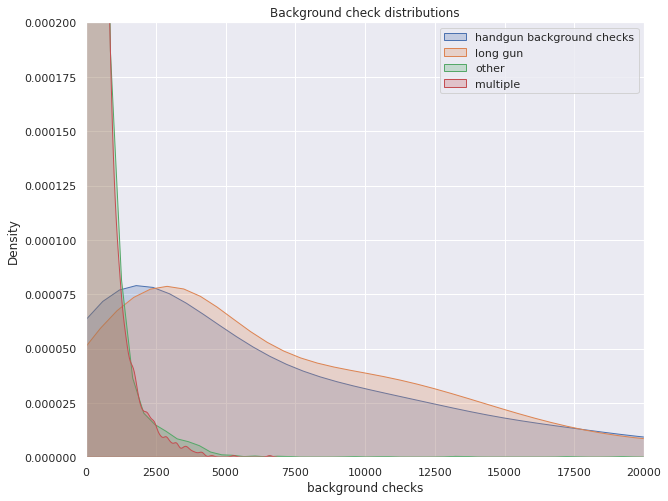

In [121]:
# plot distributions of the various types of background checks
sns.set(rc={'figure.figsize':(10,8)})
sns.kdeplot(gun_background_check['handgun'], label='handgun background checks', shade= True);
sns.kdeplot(gun_background_check['long_gun'], label='long gun', shade= True)
sns.kdeplot(gun_background_check['other'], label='other',shade= True)
sns.kdeplot(gun_background_check['multiple'], label='multiple',shade= True)
plt.legend()
plt.xlabel('background checks')
plt.title("Background check distributions")
plt.ylim(0,.0002)
plt.xlim(0,20000)




it seems like multiple and other backgroundchecks are close to zero while handguns and longguns are similar in distributions now but would like to look at how these values vary for different times and states 

In [154]:
# Use rolling average to smooth out the graph below for handguns 
gun_background_check['7year_rolling_avg_handgun'] = gun_background_check.handgun.rolling(7).mean() 

In [155]:
# Use rolling average to smooth out the graph below for longguns  
gun_background_check['7year_rolling_avg_longgun'] = gun_background_check.long_gun.rolling(7).mean() 

In [156]:
# check to see if rolling_avg columns were added to the Dataframe
gun_background_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5500 entries, 0 to 5499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      5500 non-null   datetime64[ns]
 1   state                      5500 non-null   category      
 2   handgun                    5500 non-null   float64       
 3   long_gun                   5500 non-null   float64       
 4   other                      5500 non-null   float64       
 5   multiple                   5500 non-null   int64         
 6   totals                     5500 non-null   int64         
 7   7year_rolling_avg_handgun  5494 non-null   float64       
 8   7year_rolling_avg_longgun  5494 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(5), int64(2)
memory usage: 395.0 KB


Text(0.5, 1.0, 'Line Chart of Background Checks by gun type')

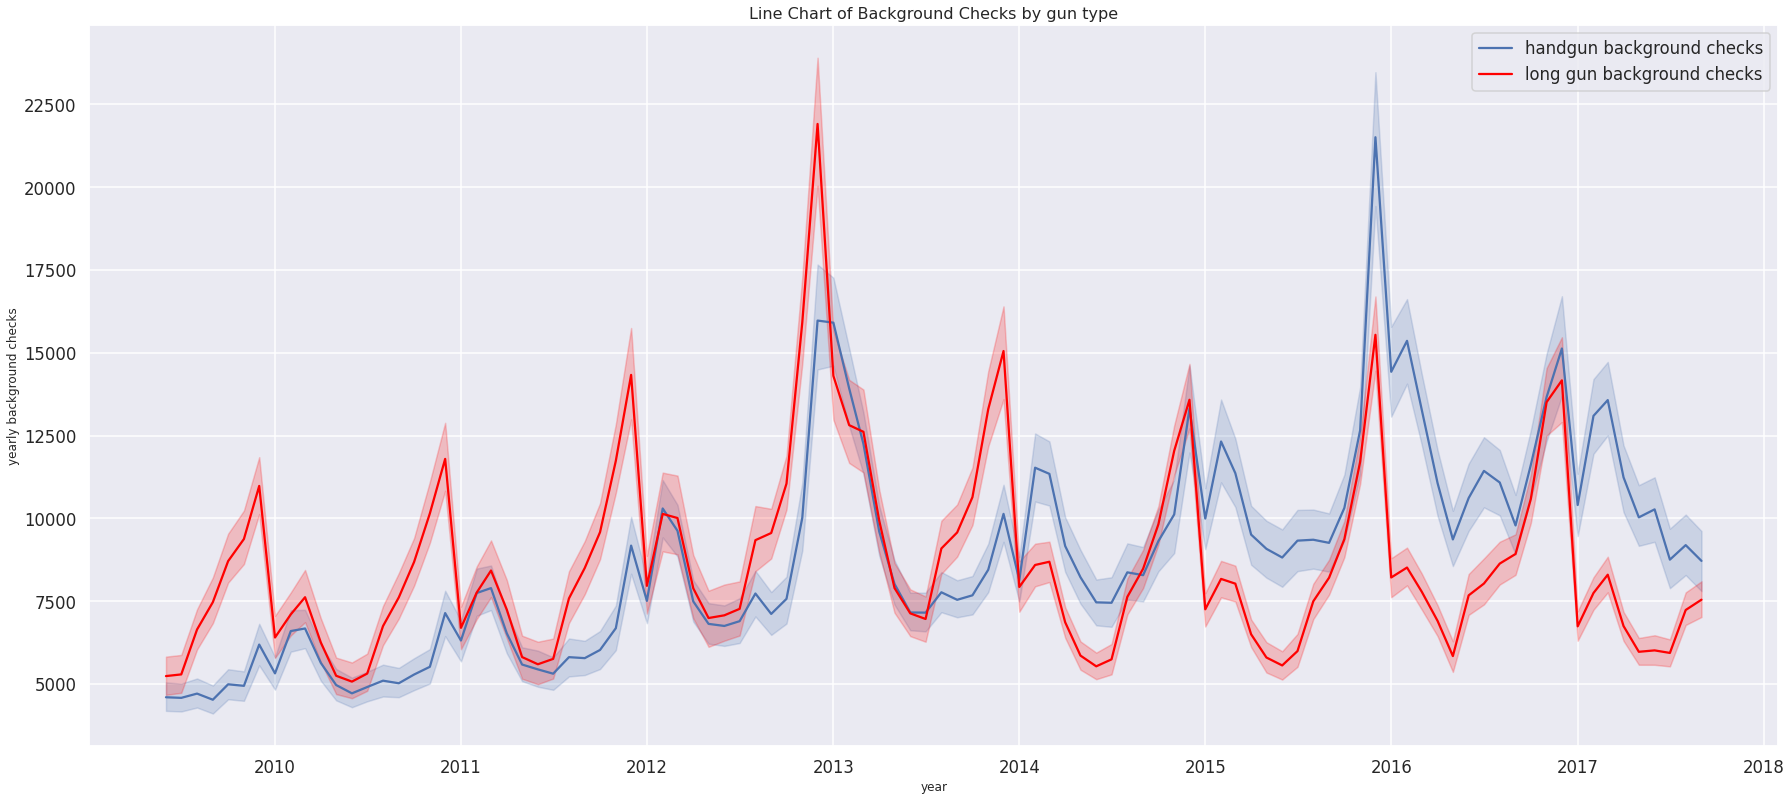

In [157]:
# graphing back
sns.set(rc={'figure.figsize':(30.27,13.27)}) # set figure size
sns.set_theme(context='talk') # set graph theme
sns.lineplot(x="month", y='7year_rolling_avg_handgun', data=gun_background_check, label='handgun background checks')
sns.lineplot(x="month", y='7year_rolling_avg_longgun', data=gun_background_check, label="long gun background checks", color='red')
plt.xlabel("year", size=12)
plt.ylabel("yearly background checks", size=12)
plt.title("Line Chart of Background Checks by gun type", size=16)


Largest Peaks seems to be around 2013 for longguns and 2015 for handguns. it might be interesting to know which states have these peaks and what polices/events where going on around that time

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


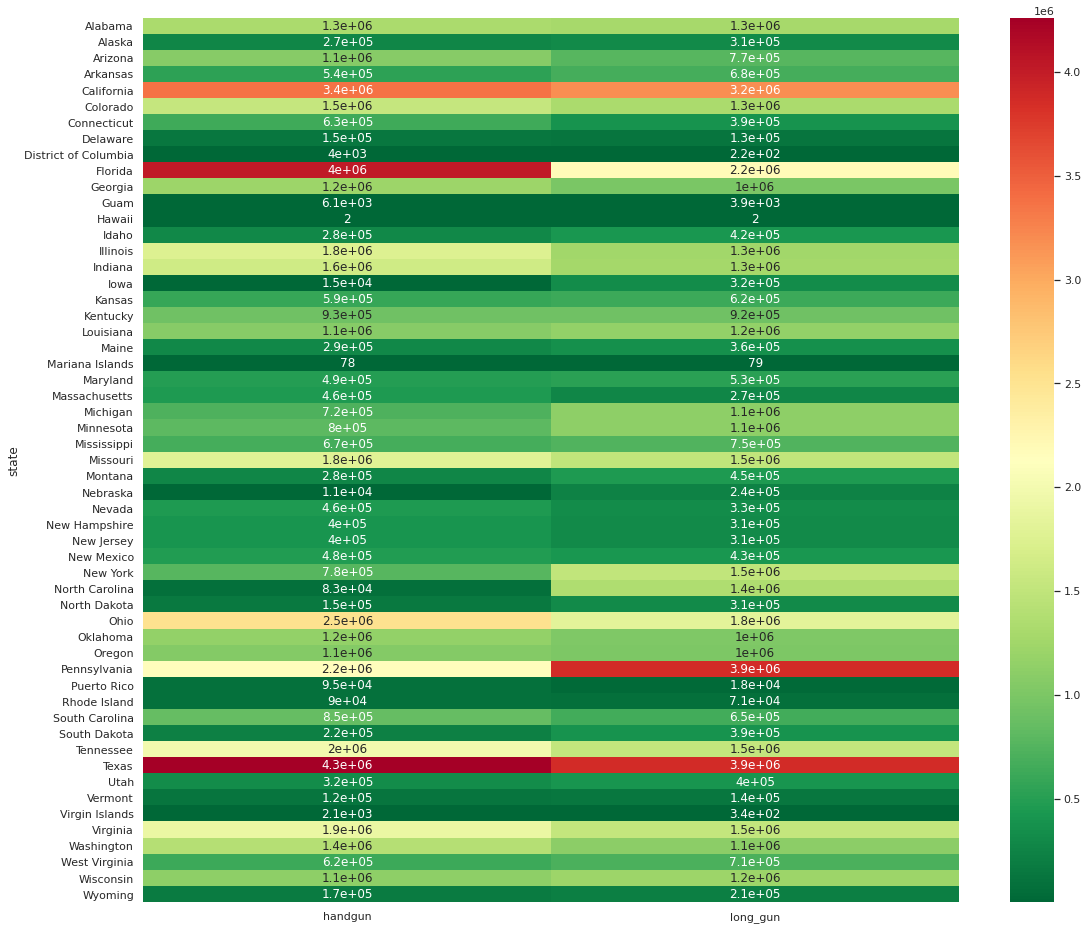

In [190]:
sns.set(rc={'figure.figsize':(18.27,16.27)}) 

sns.heatmap(gun_background_check.groupby('state') \
['handgun','long_gun'].agg('sum'),cmap='RdYlGn_r',annot=True)

The max values in regards to handguns and longguns are:

1.   Texas
2.   Pensivania 
3.   FLoria 
2.   California 

It's nice to know the top states that have the highest number of background checks, this could be an indication of states that need tighter background check polices. 

Yet what is more of an indication is mass shooting incidents complied by standford. This is where policies meet reality.



---



### WHat number of states have the highest number of MSA and for which type of gun?


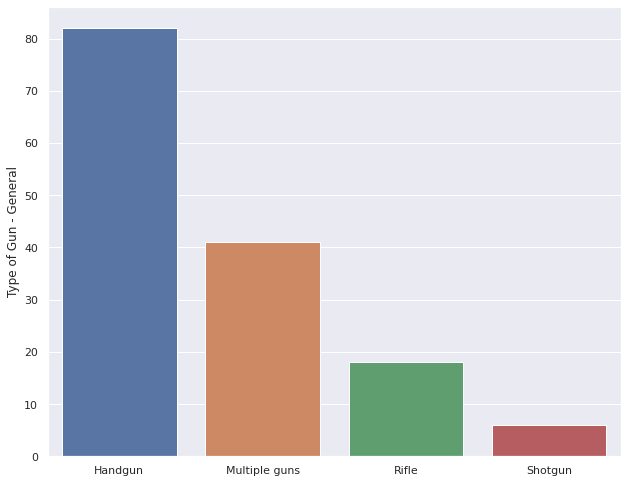

In [159]:
# PLot the type of gun
sns.set(rc={'figure.figsize':(10.27,8.27)})
sns.barplot(x=mass_shootings['Type of Gun - General'].value_counts().index, y=mass_shootings['Type of Gun - General'].value_counts())


Above it is shown that single handguns are involved in the most amount of mass shooting incidents -- around 80, multiple guns, rifles, then shotguns

In [160]:
mass_shootings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 333
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   State                                147 non-null    category
 1   Date                                 147 non-null    object  
 2   Type of Gun - General                147 non-null    object  
 3   Number of Shotguns                   147 non-null    float64 
 4   Number of Rifles                     147 non-null    float64 
 5   Number of Handguns                   147 non-null    float64 
 6   Total Number of Guns                 147 non-null    float64 
 7   Number of Automatic Guns             147 non-null    float64 
 8   Number of Semi-Automatic Guns        147 non-null    float64 
 9   Possible Motive - General            147 non-null    category
 10  History of Mental Illness - General  147 non-null    object  
dtypes: category(2), flo

In [161]:
mass_shootings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 333
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   State                                147 non-null    category
 1   Date                                 147 non-null    object  
 2   Type of Gun - General                147 non-null    object  
 3   Number of Shotguns                   147 non-null    float64 
 4   Number of Rifles                     147 non-null    float64 
 5   Number of Handguns                   147 non-null    float64 
 6   Total Number of Guns                 147 non-null    float64 
 7   Number of Automatic Guns             147 non-null    float64 
 8   Number of Semi-Automatic Guns        147 non-null    float64 
 9   Possible Motive - General            147 non-null    category
 10  History of Mental Illness - General  147 non-null    object  
dtypes: category(2), flo

In [162]:
mass_shootings.groupby(['State','Type of Gun - General']) \
['Number of Handguns'].agg('mean').unstack('Type of Gun - General').head()

Type of Gun - General,Handgun,Multiple guns,Rifle,Shotgun
State,,,,
Alabama,1.33,1.00,nan,nan
Alaska,nan,nan,nan,0.00
Arizona,2.00,0.00,nan,nan
Arkansas,nan,7.00,nan,nan
California,1.77,1.86,0.00,nan


THe heatmap below is a graph of the mean of the number of handguns in the handgun category and multiple handgun categories

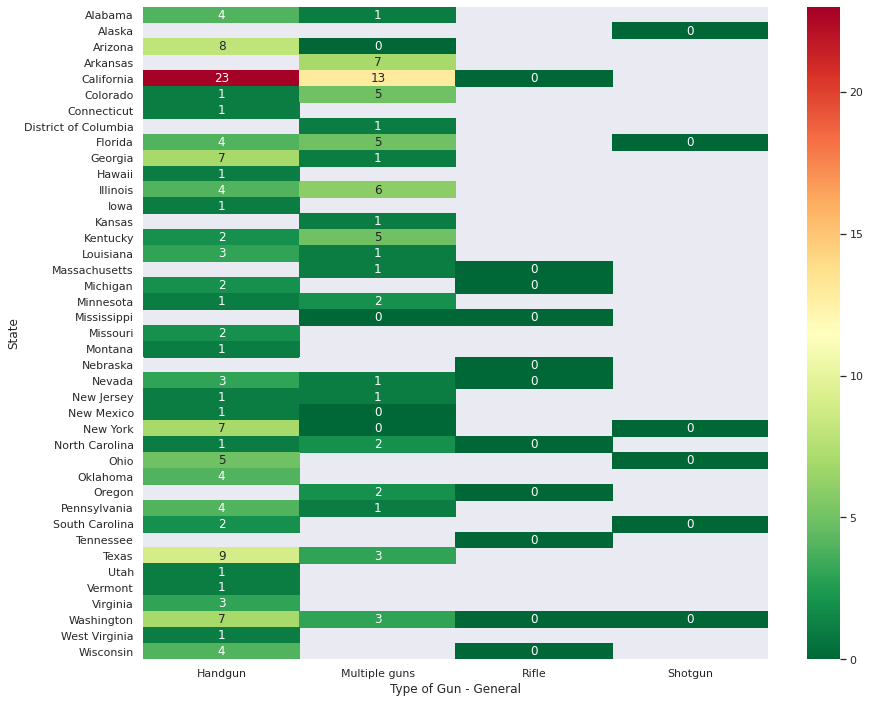

In [164]:
plt.figure(figsize=[14,12])

sns.heatmap(mass_shootings.groupby(['State','Type of Gun - General']) \
['Number of Handguns'].agg('sum').unstack('Type of Gun - General'),cmap='RdYlGn_r',annot=True)

Looks like california has the highest number of handgun mass shooting with the hangun, which is also seen in the multiple guns category as well followed by Texas, Arizona, Georgia and washington

In [83]:
plt.rcParams["figure.figsize"]

[30.27, 13.27]

we already know that handguns are in the most mas shootings based on the standford database are from handguns and muliple guns, which seems to be primary handguns.

So from the graph it can be seen that handguns are first, followed by multiple guns, rifles and shotguns yet for gun regulation it would be helpful to have more detail in regards to type of guns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


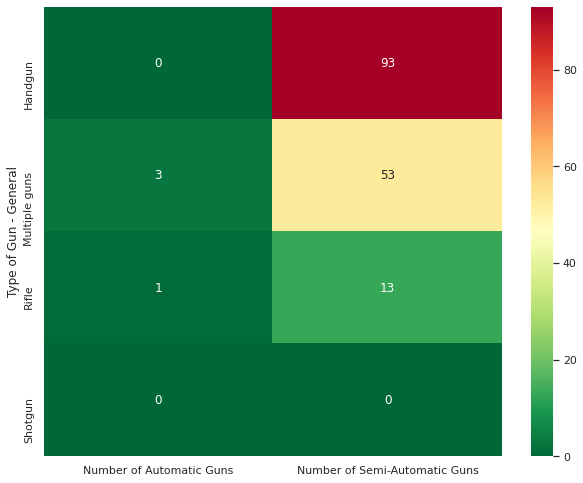

In [181]:
sns.heatmap(mass_shootings.groupby('Type of Gun - General') \
['Number of Automatic Guns', 'Number of Semi-Automatic Guns'].agg('sum'),cmap='RdYlGn_r', annot=True);

#What are common motive buy state 

In [ ]:
mass_shootings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 333
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   State                                147 non-null    category      
 1   Date                                 147 non-null    datetime64[ns]
 2   Type of Gun - General                147 non-null    category      
 3   Number of Shotguns                   147 non-null    float64       
 4   Number of Rifles                     147 non-null    float64       
 5   Number of Handguns                   147 non-null    float64       
 6   Total Number of Guns                 147 non-null    float64       
 7   Number of Automatic Guns             147 non-null    float64       
 8   Number of Semi-Automatic Guns        147 non-null    float64       
 9   Possible Motive - General            147 non-null    category      
 10  History of Men

Text(0.5, 0, 'Mass Shooting Incidents')

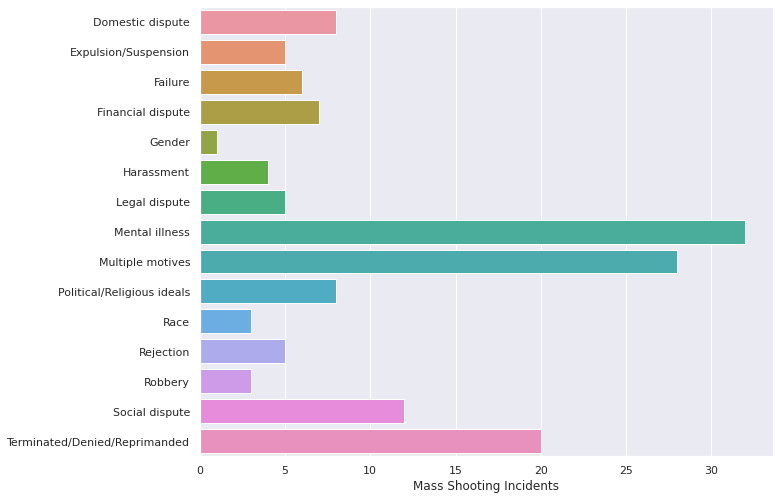

In [ ]:
# PLot the type of gun
sns.barplot(y=mass_shootings['Possible Motive - General'].value_counts().index, x=mass_shootings['Possible Motive - General'].value_counts(), data=mass_shootings)
plt.xticks(horizontalalignment="center")

plt.xlabel('Mass Shooting Incidents')

looks like mental illness is the top causes the last question is what the connection is with handgns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


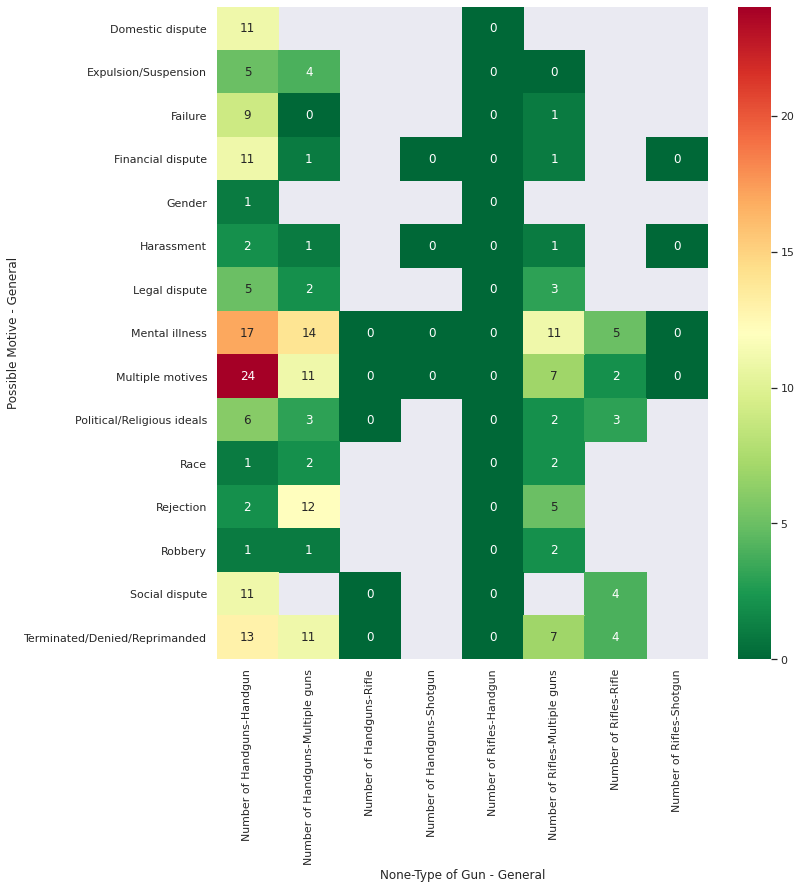

In [183]:
plt.figure(figsize=[11,12])

sns.heatmap(mass_shootings.groupby(['Type of Gun - General','Possible Motive - General']) \
['Number of Handguns','Number of Rifles'].agg('sum').unstack('Type of Gun - General'),cmap='RdYlGn_r',annot=True)

**bold text**<a id='conclusions'></a>
# Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

## Permit Conclusions

### Mass Shooting guns data 

### Mass shooting motives 